In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
gnomad = pd.read_csv("../raw_files/gnomad.bed", sep = "\t", header = None)
# gnomad = gnomad[[0, 1, 2, 3, 4]]
gnomad = gnomad.rename(columns = {5 : "gnomad_allele_freq"})
for col_num in [1, 2, "gnomad_allele_freq"]:
    gnomad[col_num] = gnomad[col_num].astype(float)
gnomad[0] = gnomad[0].astype(str)
gnomad

,0,1,2,3,4,gnomad_allele_freq
0,2,207081140.0,207081141.0,T,C,3.216086e-06
1,2,207081144.0,207081145.0,G,C,7.777610e-07
2,2,207081145.0,207081146.0,C,G,7.714145e-07
3,2,207081146.0,207081147.0,C,T,1.529487e-06
4,2,207081147.0,207081148.0,C,T,5.777024e-06
...,...,...,...,...,...,...
107567,19,13094705.0,13094706.0,G,A,7.334088e-07
107568,19,13094708.0,13094709.0,G,T,1.997268e-06
107569,19,13094710.0,13094711.0,A,G,1.250769e-06
107570,19,13094717.0,13094718.0,A,G,3.763805e-05


In [119]:
pd.read_csv("../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/ENST00000056233.bed", sep = "\t", header = None)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,7,26183703,26183704,AD,ENSG00000050344,.,+,ENST00000056233,7,26183703,...,+,7,26183703,26183704,C,G,0.000033,H,D,No-Syn
1,7,26183703,26183704,AD,ENSG00000050344,.,+,ENST00000056233,7,26183703,...,+,7,26183703,26183704,C,T,0.000005,H,Y,No-Syn
2,7,26183704,26183705,AD,ENSG00000050344,.,+,ENST00000056233,7,26183704,...,+,7,26183704,26183705,A,G,0.000023,H,R,No-Syn
3,7,26183718,26183719,AD,ENSG00000050344,.,+,ENST00000056233,7,26183718,...,+,7,26183718,26183719,G,C,0.000005,D,H,No-Syn
4,7,26183720,26183721,AD,ENSG00000050344,.,+,ENST00000056233,7,26183720,...,+,7,26183720,26183721,T,C,0.000014,D,D,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,7,26185040,26185041,AD,ENSG00000050344,.,+,ENST00000056233,7,26185040,...,+,7,26185040,26185041,G,T,0.000089,G,V,No-Syn
134,7,26185044,26185045,AD,ENSG00000050344,.,+,ENST00000056233,7,26185044,...,+,7,26185044,26185045,T,C,0.000023,Y,Y,Syn
135,7,26185046,26185047,AD,ENSG00000050344,.,+,ENST00000056233,7,26185046,...,+,7,26185046,26185047,G,A,0.000066,C,Y,No-Syn
136,7,26185047,26185048,AD,ENSG00000050344,.,+,ENST00000056233,7,26185047,...,+,7,26185047,26185048,C,T,0.164651,C,C,Syn


In [121]:
domain_output = pd.read_csv("../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/ENST00000056233.bed", sep = "\t", header = None)
domain_output = domain_output[domain_output[22] == "No-Syn"]
domain_output = domain_output[[0, 1, 2, 17, 18, 19, 3]]
domain_output = domain_output.rename(columns = {17: 3, 18: 4, 19: "iWES_allele_freq", 3: "domain_type"})
for col_num in [1, 2, "iWES_allele_freq"]:
    domain_output[col_num] = domain_output[col_num].astype(float)
domain_output[0] = domain_output[0].astype(str)
domain_output

,0,1,2,3,4,iWES_allele_freq,domain_type
0,7,26183703.0,26183704.0,C,G,0.000033,AD
1,7,26183703.0,26183704.0,C,T,0.000005,AD
2,7,26183704.0,26183705.0,A,G,0.000023,AD
3,7,26183718.0,26183719.0,G,C,0.000005,AD
7,7,26183760.0,26183761.0,T,C,0.000033,AD
...,...,...,...,...,...,...,...
131,7,26185038.0,26185039.0,A,G,0.000009,AD
132,7,26185039.0,26185040.0,G,A,0.000009,AD
133,7,26185040.0,26185041.0,G,T,0.000089,AD
135,7,26185046.0,26185047.0,G,A,0.000066,AD


In [122]:
gnomad_iwes_overlap = pd.merge(domain_output, gnomad, on = [0, 1,2, 3, 4], how = "inner")
gnomad_iwes_overlap

,0,1,2,3,4,iWES_allele_freq,domain_type,gnomad_allele_freq
0,7,26183703.0,26183704.0,C,G,0.000033,AD,0.000003
1,7,26183704.0,26183705.0,A,G,0.000023,AD,0.000006
2,7,26183718.0,26183719.0,G,C,0.000005,AD,0.000003
3,7,26183760.0,26183761.0,T,C,0.000033,AD,0.000012
4,7,26183769.0,26183770.0,G,C,0.000028,AD,0.000022
...,...,...,...,...,...,...,...,...
75,7,26185038.0,26185039.0,A,G,0.000009,AD,0.000011
76,7,26185039.0,26185040.0,G,A,0.000009,AD,0.000010
77,7,26185040.0,26185041.0,G,T,0.000089,AD,0.000033
78,7,26185046.0,26185047.0,G,A,0.000066,AD,0.000027


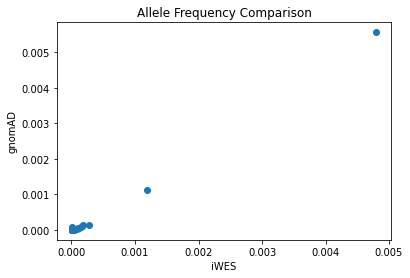

In [123]:
plt.scatter(data = gnomad_iwes_overlap, x = "iWES_allele_freq", y = "gnomad_allele_freq")
plt.title("Allele Frequency Comparison")
plt.xlabel("iWES");
plt.ylabel("gnomAD");

In [124]:
gnomad_iwes_overlap["iWES_allele_freq"]

0     0.000033
1     0.000023
2     0.000005
3     0.000033
4     0.000028
        ...   
75    0.000009
76    0.000009
77    0.000089
78    0.000066
79    0.000009
Name: iWES_allele_freq, Length: 80, dtype: float64

In [125]:
boundary = gnomad_iwes_overlap["iWES_allele_freq"].quantile(0.95)
boundary

0.00016514999999999995

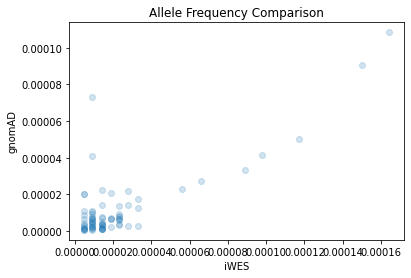

In [126]:
outlier_removed = gnomad_iwes_overlap[gnomad_iwes_overlap["iWES_allele_freq"] < boundary]
                                                          
plt.scatter(data = outlier_removed, x = "iWES_allele_freq", y = "gnomad_allele_freq", alpha = 0.2)
plt.title("Allele Frequency Comparison")
plt.xlabel("iWES");
plt.ylabel("gnomAD");

In [127]:
gnomad_iwes_overlap[gnomad_iwes_overlap["iWES_allele_freq"] >= boundary]

,0,1,2,3,4,iWES_allele_freq,domain_type,gnomad_allele_freq
14,7,26184629.0,26184630.0,A,G,0.004797,AD,0.005568
25,7,26184735.0,26184736.0,T,A,0.001194,AD,0.001126
68,7,26185016.0,26185017.0,C,G,0.000187,AD,0.000147
69,7,26185019.0,26185020.0,T,A,0.000272,AD,0.000136


---

Steps:
- For every TF find number of iWES gnomAD overlaps in: 
    - AD
    - DBD
    - full TF
- Load in iWES results table for all variants, AD vs DBD 
    - Add gnomAD overlap counts to the table
- Enrichment analysis on variants overlapped with gnomAD